DAY 2(QUESTION 1)

![day2_q1(1st half).jpeg](<attachment:day2_q1(1st half).jpeg>)
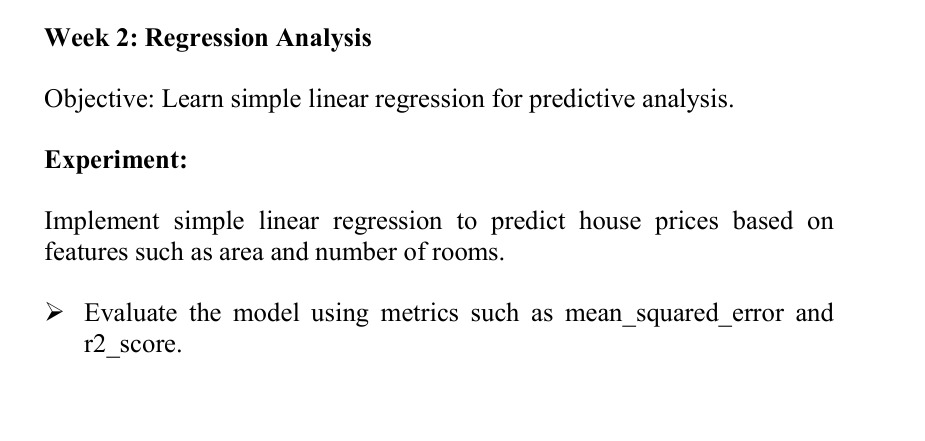

![day2_q1(2nd half).jpeg](<attachment:day2_q1(2nd half).jpeg>)
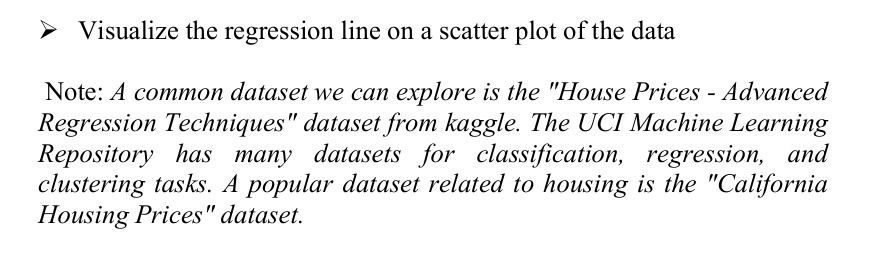


Model Evaluation:
Mean Squared Error (MSE): 9708.780647625654
R² Score: 0.3994641808440935


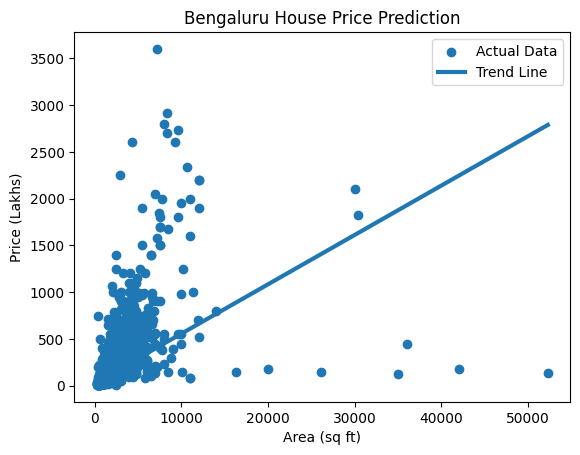

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load Dataset
df = pd.read_csv(r"C:\Users\KIIT0001\Desktop\AD(6th Semester)\bengaluru_house_prices.csv")


# Data Cleaning
# A. Extract numeric BHK from the "size" column
def convert_bhk(x):
    try:
        return int(x.split()[0])
    except:
        return None
df["bhk"] = df["size"].apply(convert_bhk)
# Remove rows where BHK could not be extracted
df = df.dropna(subset=["bhk"])
# B. Convert total_sqft ranges like "1200-1500"
def convert_sqft(x):
    try:
        if "-" in x:
            low, high = x.split("-")
            return (float(low) + float(high)) / 2
        return float(x)
    except:
        return None
df["total_sqft"] = df["total_sqft"].apply(convert_sqft)
# Remove rows where sqft could not be converted
df = df.dropna(subset=["total_sqft"])
# C. Keep only valid positive values
df = df[(df["total_sqft"] > 200) & (df["bhk"] > 0)]


# Select Features and Target
X = df[["total_sqft", "bhk", "bath", "balcony"]]
y = df["price"]   # price in lakhs
# Remove NaN from features
X = X.dropna()
y = y[X.index]


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


# Predictions & Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


# Plot: Price vs Area (Using Average BHK/Bath/Balcony)
avg_bhk = df["bhk"].mean()
avg_bath = df["bath"].mean()
avg_balcony = df["balcony"].mean()
area_range = np.linspace(df["total_sqft"].min(), df["total_sqft"].max(), 100)
trend_df = pd.DataFrame({
    "total_sqft": area_range,
    "bhk": avg_bhk,
    "bath": avg_bath,
    "balcony": avg_balcony
})
trend_predictions = model.predict(trend_df)
plt.scatter(df["total_sqft"], df["price"], label="Actual Data")
plt.plot(area_range, trend_predictions, label="Trend Line", linewidth=3)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (Lakhs)")
plt.title("Bengaluru House Price Prediction")
plt.legend()
plt.show()


DAY 2(QUESTION 2)

In [2]:
#Mean, Median, Mode from Frequency Table(NUMERICAL QUESTION 1)

from statistics import mean, median, multimode
# Given data
values = [0, 1, 2, 3, 4, 5]
frequencies = [27, 96, 58, 54, 18, 7]
# Expanding data based on frequencies
data = []
for v, f in zip(values, frequencies):
    data.extend([v] * f)
# Calculating central tendencies
mean_value = mean(data)
median_value = median(data)
mode_value = multimode(data)
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)


Mean: 1.85
Median: 2.0
Mode: [1]


DAY 2(QUESTION 3)

In [3]:
#Percentage Calculations from Height Table(NUMERICAL QUESTION 2)

# Height ranges and frequencies
ranges = [
    (59.95, 61.95),
    (61.95, 63.95),
    (63.95, 65.95),
    (65.95, 67.95),
    (67.95, 69.95),
    (69.95, 71.95),
    (71.95, 73.95),
    (73.95, 75.95)
]
freq = [5, 3, 15, 40, 17, 12, 7, 1]
total_players = sum(freq)
# (a) Percentage < 65.95 inches
below_65_95 = freq[0] + freq[1] + freq[2]
percent_a = (below_65_95 / total_players) * 100
# (b) Percentage between 61.95 and 65.95
between_61_95_65_95 = freq[1] + freq[2]
percent_b = (between_61_95_65_95 / total_players) * 100
# (c) Number of players between 61.95 and 71.95
between_61_95_71_95 = freq[1] + freq[2] + freq[3] + freq[4] + freq[5]
print("Percentage of heights < 65.95 inches:", percent_a, "%")
print("Percentage of heights between 61.95 and 65.95 inches:", percent_b, "%")
print("Players between 61.95 and 71.95 inches:", between_61_95_71_95)


Percentage of heights < 65.95 inches: 23.0 %
Percentage of heights between 61.95 and 65.95 inches: 18.0 %
Players between 61.95 and 71.95 inches: 87


DAY 2(QUESTION 4)

In [4]:
#Measures of Variability(NUMERICAL QUESTION 3)

import math
# Given dataset
data = [46, 69, 32, 60, 52, 41]
# Step 1: Mean
mean_value = sum(data) / len(data)
# Step 2 and 3: Deviations and squared deviations
squared_deviations = []
for x in data:
    dev = x - mean_value
    squared_deviations.append(dev ** 2)
# Step 4: Sum of squared deviations
SSV = sum(squared_deviations)
# Step 5: Sample variance (N-1)
variance = SSV / (len(data) - 1)
# Step 6: Sample standard deviation
std_dev = math.sqrt(variance)
# Printing results
print("Data:", data)
print("Mean:", mean_value)
print("Squared Deviations:", squared_deviations)
print("Sum of Squared Deviations (SSV):", SSV)
print("Sample Variance:", variance)
print("Sample Standard Deviation:", std_dev)


Data: [46, 69, 32, 60, 52, 41]
Mean: 50.0
Squared Deviations: [16.0, 361.0, 324.0, 100.0, 4.0, 81.0]
Sum of Squared Deviations (SSV): 886.0
Sample Variance: 177.2
Sample Standard Deviation: 13.311649033834989


DAY 2(QUESTION 5)

In [5]:
#Grouped Data: Skewness and Kurtosis(NUMERICAL QUESTION 4)

# Grouped data for classes and frequencies
classes = [(2, 4), (4, 6), (6, 8), (8, 10)]
frequencies = [3, 4, 2, 1]
# Step 1: Calculate mid-values
mid_values = [(a + b) / 2 for a, b in classes]
# Step 2: Mean of grouped data
total_f = sum(frequencies)
mean = sum(f * x for f, x in zip(frequencies, mid_values)) / total_f
# Step 3: Compute deviation values
dev1 = []  # f * (x - mean)
dev2 = []  # f * (x - mean)^2
dev3 = []  # f * (x - mean)^3
dev4 = []  # f * (x - mean)^4
for f, x in zip(frequencies, mid_values):
    d = x - mean
    dev1.append(f * d)
    dev2.append(f * (d ** 2))
    dev3.append(f * (d ** 3))
    dev4.append(f * (d ** 4))
# Step 4: Sum of squares and higher powers
sum_dev2 = sum(dev2)
sum_dev3 = sum(dev3)
sum_dev4 = sum(dev4)
# Step 5: Standard deviation
SD = (sum_dev2 / total_f) ** 0.5
# Step 6: Skewness (sample skewness)
skewness = (sum_dev3 / ((total_f - 1) * (SD ** 3)))
# Step 7: Kurtosis (sample kurtosis)
kurtosis = (sum_dev4 / ((total_f - 1) * (SD ** 4)))
# Output results
print("Mid Values:", mid_values)
print("Mean:", mean)
print("Standard Deviation:", SD)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Mid Values: [3.0, 5.0, 7.0, 9.0]
Mean: 5.2
Standard Deviation: 1.8867962264113207
Skewness: 0.5716842498910703
Kurtosis: 2.628315728934338


DAY 2(QUESTION 6)

In [6]:
#Outlier Detection (Using IQR Method)(NUMERICAL QUESTION 5)

import numpy as np
# Given data
data = [78, 82, 85, 90, 92, 94, 95, 100, 110, 120, 150]
# Step 1: Sort the data
data_sorted = sorted(data)
# Step 2: Calculate Q1 and Q3 (using numpy percentile)
Q1 = np.percentile(data_sorted, 25)
Q3 = np.percentile(data_sorted, 75)
# Step 3: Calculate IQR
IQR = Q3 - Q1
# Step 4: Calculate fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
# Step 5: Identify outliers
outliers = [x for x in data_sorted if x < lower_fence or x > upper_fence]
# Print results
print("Sorted Data:", data_sorted)
print("Q1 =", Q1)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Lower Fence =", lower_fence)
print("Upper Fence =", upper_fence)
print("Outliers:", outliers)


Sorted Data: [78, 82, 85, 90, 92, 94, 95, 100, 110, 120, 150]
Q1 = 87.5
Q3 = 105.0
IQR = 17.5
Lower Fence = 61.25
Upper Fence = 131.25
Outliers: [150]
